In [11]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
LOAD DATA
EXPLORE DATA
PREPARE FEATURES
SPLIT DATA
SCALE DATA (if needed)
TRAIN MODEL
MAKE PREDICTIONS
EVALUATE (accuracy, precision, recall, f1, confusion matrix, ROC)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import(
accuracy_score,
confusion_matrix,
precision_score,
recall_score,
classification_report,
roc_curve,
roc_auc_score
)

In [13]:
# Step 1: load data and srep 2(Explore)
titanic = sns.load_dataset('titanic')

In [14]:
titanic['survived'].value_counts()

survived
0    549
1    342
Name: count, dtype: int64

In [6]:
titanic['survived'].mean().round(2)

np.float64(0.38)

In [15]:
# Step 3 : Prepare Features

wanted_columns = ['pclass', 'sex', 'age', 'fare', 'survived']

titanic_for_model = titanic[wanted_columns]
titanic_for_model.head()

,pclass,sex,age,fare,survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [16]:
titanic_for_model = titanic_for_model.dropna()

In [17]:
mapping = {
    'male': 0,
    'female': 1
}

titanic_for_model['sex'] = titanic_for_model['sex'].map(mapping)

In [18]:
X = titanic_for_model[['pclass', 'sex', 'age', 'fare']] 
y = titanic_for_model['survived']

In [19]:
X.head()

,pclass,sex,age,fare
0,3,0,22.0,7.2500
1,1,1,38.0,71.2833
2,3,1,26.0,7.9250
3,1,1,35.0,53.1000
4,3,0,35.0,8.0500


In [20]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64

In [21]:
# Step 4 - Scale

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [22]:
X_scaled[:5]

array([[ 0.91123237, -0.75905134, -0.53037664, -0.51897787],
       [-1.47636364,  1.31743394,  0.57183099,  0.69189675],
       [ 0.91123237,  1.31743394, -0.25482473, -0.50621356],
       [-1.47636364,  1.31743394,  0.36516706,  0.34804915],
       [ 0.91123237, -0.75905134,  0.36516706, -0.5038498 ]])

In [23]:
# Syep 5 - Split the data to train and test sets

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 42, stratify = y)

In [24]:
y_train.mean()

np.float64(0.4063047285464098)

In [25]:
y_test.mean()

# y_test mean should be as y_train mean

np.float64(0.40559440559440557)

In [26]:
# Syep 6 and 7: Train and make predictions

logistic_regression_model = LogisticRegression(max_iter = 1000)
logistic_regression_model.fit(X_train, y_train)

y_prediction_logistic = logistic_regression_model.predict(X_test)

In [27]:
# Step 8 Evaluation

print(classification_report(y_test, y_prediction_logistic))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        85
           1       0.75      0.72      0.74        58

    accuracy                           0.79       143
   macro avg       0.78      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143



In [28]:
confusion_matrix_logistic = confusion_matrix(y_test, y_prediction_logistic)

<Axes: >

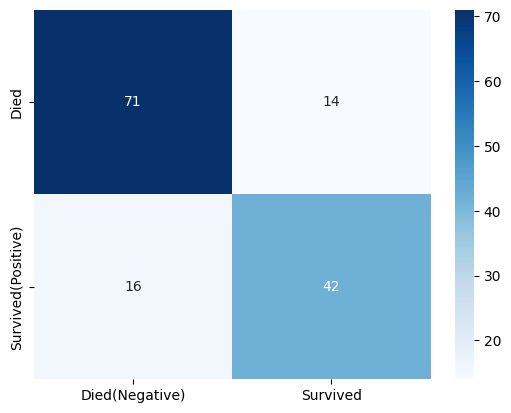

In [29]:
sns.heatmap(
  confusion_matrix_logistic,
  annot = True,
  cmap = 'Blues',
  xticklabels = ['Died(Negative)', 'Survived'],
  yticklabels = ['Died', 'Survived(Positive)'],
)

In [30]:
y_probability_logistic = logistic_regression_model.predict_proba(X_test)
survived_probabilities = y_probability_logistic[:, 1] #survived column

In [31]:
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

for threshold in thresholds:

    y_prediction_threshold = (survived_probabilities >= threshold).astype(int) # convert the True/False

    accuracy = accuracy_score(y_test, y_prediction_threshold)
    precision = precision_score(y_test, y_prediction_threshold)
    recall = recall_score(y_test, y_prediction_threshold)

    print(f'THRESHOLD {threshold}:\n ACC - {accuracy:.2f}\n PRECISION - {precision:.2f}\n RECALL - {recall:.2f}')

THRESHOLD 0.3:
 ACC - 0.75
 PRECISION - 0.65
 RECALL - 0.83
THRESHOLD 0.4:
 ACC - 0.80
 PRECISION - 0.73
 RECALL - 0.83
THRESHOLD 0.5:
 ACC - 0.79
 PRECISION - 0.75
 RECALL - 0.72
THRESHOLD 0.6:
 ACC - 0.78
 PRECISION - 0.80
 RECALL - 0.62
THRESHOLD 0.7:
 ACC - 0.80
 PRECISION - 0.97
 RECALL - 0.53


In [33]:
KNN (K-Nearest Neighbor)

                          
..../                        ..   ..
.. /                       . .. . .. .
  / .....                    ..   ..
 /.....
/

Majority wins!!!!

IndentationError: unindent does not match any outer indentation level (<string>, line 7)

# KNN - k neirest neighbors

In [34]:
Train set (memorized by KNN):

Passenger | pclass | sex | age | fare | Survived?
A            -0.8    0.7  -0.3    0.5      YES
B            -0.8    0.7  -0.2    0.6      YES
C             0.9   -1.4   0.0   -0.5      NO

SyntaxError: invalid syntax (3905228075.py, line 1)

In [35]:
NEW PASSENGER: pclass = 1, sex = 1(female), age = 25, fare = 100
NEW PASSENGER SCALED: pclass = -0.8, sex = 0.7, age = -0.2, fare = 0.4 | SURVIVED?

SyntaxError: invalid syntax (2407837305.py, line 1)

In [36]:
distance to A: корень [(-0.8 - (-0.8))^2 + (0.7 - 0.7^2 + (-0.2 - (-0.3))^2 + (0.4 - 0.5)^2]
            = 0.14 <- very close
distance to B: ...
distance to C: ...

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (3586263697.py, line 1)

In [37]:
With K = 3: A(Survived), B(Survived), C(Died)
Vote: 2 survived vs. 1 died -> Prediction: 'Survived'

SyntaxError: invalid syntax (11302996.py, line 1)

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
knn_model = KNeighborsClassifier(n_neighbors=5)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn_model.fit(X_train_scaled, y_train)

# Prediction on the test set
y_pred_knn = knn_model.predict(X_test_scaled)

In [40]:
confusion_matrix_knn = confusion_matrix(y_test, y_pred_knn)

In [41]:
confusion_matrix_knn.ravel() # ravel unpacks all values at once into a 1-D array

array([70, 15, 17, 41])

In [ ]:
true_nrgative, false_positive, f_negative, true_positive = confusion_matrix_knn.ravel()

# Overfitting and Underfitting

In [44]:
# Overfitting
knn_model_overfit = KNeighborsClassifier(n_neighbors=1)

knn_model_overfit.fit(X_train_scaled, y_train)

# Prediction on the test set
y_pred_knn_overfit = knn_model_overfit.predict(X_test_scaled)
y_pred_knn_overfit

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1])

In [45]:
accuracy_knn = accuracy_score(y_test, y_pred_knn_overfit)
accuracy_knn

0.7272727272727273

In [49]:
# Underfitting
knn_model_underfit = KNeighborsClassifier(n_neighbors=500)

knn_model_underfit.fit(X_train_scaled, y_train)

# Prediction on the test set
y_pred_knn_underfit = knn_model_underfit.predict(X_test_scaled)
y_pred_knn_underfit

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [50]:
accuracy_knn = accuracy_score(y_test, y_pred_knn_underfit)
accuracy_knn

0.5944055944055944

In [52]:
k_values = [1, 3, 5, 7, 9, 15, 25, 50, 100]

for k in k_values:
    knn_temporary = KNeighborsClassifier(k)
    knn_temporary.fit(X_train, y_train)
    y_knn_predict = knn_temporary.predict(X_test)

    test_accuracy = accuracy_score(y_test, y_knn_predict)
    test_recall = recall_score(y_test, y_knn_predict)

    print(f'K={k} | accuracy : {test_accuracy} | recall : {test_recall}')

K=1 | accuracy : 0.7272727272727273 | recall : 0.7413793103448276
K=3 | accuracy : 0.7762237762237763 | recall : 0.7931034482758621
K=5 | accuracy : 0.7762237762237763 | recall : 0.7068965517241379
K=7 | accuracy : 0.7902097902097902 | recall : 0.7241379310344828
K=9 | accuracy : 0.7972027972027972 | recall : 0.7068965517241379
K=15 | accuracy : 0.8181818181818182 | recall : 0.7413793103448276
K=25 | accuracy : 0.7832167832167832 | recall : 0.6379310344827587
K=50 | accuracy : 0.7902097902097902 | recall : 0.5689655172413793
K=100 | accuracy : 0.7902097902097902 | recall : 0.7241379310344828


# Support Vector Machines (SVM)

In [53]:
from sklearn.svm import SVC

In [54]:
svm = SVC(kernel = 'rbf', random_state = 42)
svm.fit(X_train, y_train) # must use scaled data

y_predict_svm = svm.predict(X_test)
y_predict_svm

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [55]:
accuracy_score(y_test, y_predict_svm)

0.8111888111888111

In [56]:
precision_score(y_test, y_predict_svm)

0.8974358974358975

In [57]:
recall_score(y_test, y_predict_svm)

0.603448275862069

In [59]:
print(classification_report(y_test, y_predict_svm))

              precision    recall  f1-score   support

           0       0.78      0.95      0.86        85
           1       0.90      0.60      0.72        58

    accuracy                           0.81       143
   macro avg       0.84      0.78      0.79       143
weighted avg       0.83      0.81      0.80       143



In [60]:
kernels = 'linear', 'rbf', 'poly'

In [61]:
for kernel in kernels:
    svm_temporary = SVC(kernel = kernel, random_state = 42)
    svm_temporary.fit(X_train, y_train)
    svm_temporary_y_predict = svm_temporary.predict(X_test)
    print(f'kernel {kernel}:/n {classification_report(y_test, svm_temporary_y_predict)}')

kernel linear:/n               precision    recall  f1-score   support

           0       0.81      0.84      0.82        85
           1       0.75      0.71      0.73        58

    accuracy                           0.78       143
   macro avg       0.78      0.77      0.77       143
weighted avg       0.78      0.78      0.78       143

kernel rbf:/n               precision    recall  f1-score   support

           0       0.78      0.95      0.86        85
           1       0.90      0.60      0.72        58

    accuracy                           0.81       143
   macro avg       0.84      0.78      0.79       143
weighted avg       0.83      0.81      0.80       143

kernel poly:/n               precision    recall  f1-score   support

           0       0.82      0.85      0.83        85
           1       0.76      0.72      0.74        58

    accuracy                           0.80       143
   macro avg       0.79      0.79      0.79       143
weighted avg       0.80     

# С parameter, how much do we punish mistakes?

- Low С (e.g. 0.01) = wide margin, some errors. Simple boundary, better generalization, some training errors
- High C (e.g. 100) = narrow margin, perfect training. Might overfit, may not generalize well

Practical recommendation: start with с =1 (default), then try 0.1 and 10  to see what works best for your data

In [67]:
c_values = 0.001, 0.01, 0.1, 1, 10, 100

for c in c_values:
    svm_temporary = SVC(C=c, kernel = 'rbf', random_state = 42)
    svm_temporary.fit(X_train, y_train)
    svm_temporary_y_prediction = svm_temporary.predict(X_test)

    print(f'C = {c} | {classification_report(y_test, svm_temporary_y_prediction)}')

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\metrics\_classif

C = 0.001 |               precision    recall  f1-score   support

           0       0.59      1.00      0.75        85
           1       0.00      0.00      0.00        58

    accuracy                           0.59       143
   macro avg       0.30      0.50      0.37       143
weighted avg       0.35      0.59      0.44       143

C = 0.01 |               precision    recall  f1-score   support

           0       0.59      1.00      0.75        85
           1       0.00      0.00      0.00        58

    accuracy                           0.59       143
   macro avg       0.30      0.50      0.37       143
weighted avg       0.35      0.59      0.44       143

C = 0.1 |               precision    recall  f1-score   support

           0       0.82      0.84      0.83        85
           1       0.75      0.72      0.74        58

    accuracy                           0.79       143
   macro avg       0.78      0.78      0.78       143
weighted avg       0.79      0.79      0.